In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np

/Users/shanelljones/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/shanelljones/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/shanelljones/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/shanelljones/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/Users/shanelljones/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, m

In [60]:
words_coef=pd.read_csv('words_coef.csv',index_col='Unnamed: 0')

In [116]:
words_coef.sort_values(by='cv_lr_coef',ascending=False).head()

,words,cv_lr_coef,tf_lr_coef,cv_mbn_coef,tf_mbn_coef,cv_bnb_coef,tf_bnb_coef
604,climate,0.522300,3.641332,-6.540068,-7.101668,-3.270836,-3.270836
899,did,0.472351,2.907859,-6.791382,-7.388833,-3.522150,-3.522150
1902,media,0.464427,2.244517,-6.339397,-7.135266,-3.070165,-3.070165
2436,realclearpolitics,0.451983,2.971745,-7.127854,-7.336633,-3.858622,-3.858622
109,adam,0.446040,3.941668,-6.945533,-7.365006,-3.676301,-3.676301


In [104]:
words_coef.sort_values(by='cv_lr_coef',ascending=True).head()

,words,cv_lr_coef,tf_lr_coef,cv_mbn_coef,tf_mbn_coef,cv_bnb_coef,tf_bnb_coef
1515,impeachment,-1.064275,-5.848883,-6.657851,-7.451509,-3.388619,-3.388619
3100,trump,-0.832086,-6.044914,-4.532599,-6.270208,-1.293673,-1.293673
202,and,-0.730290,-6.201699,-5.692770,-7.102034,-2.523621,-2.523621
31,2020,-0.658176,-3.417652,-8.044145,-8.104346,-4.774913,-4.774913
2727,should,-0.631798,-4.176759,-8.737292,-8.324987,-5.468060,-5.468060


In [105]:
words_coef.sort_values(by='tf_lr_coef',ascending=False).head()

,words,cv_lr_coef,tf_lr_coef,cv_mbn_coef,tf_mbn_coef,cv_bnb_coef,tf_bnb_coef
109,adam,0.446040,3.941668,-6.945533,-7.365006,-3.676301,-3.676301
604,climate,0.522300,3.641332,-6.540068,-7.101668,-3.270836,-3.270836
2435,realclearinvestigations,0.309190,3.254254,-7.638680,-7.758840,-4.369448,-4.369448
1907,meeting,0.433794,3.231965,-7.127854,-7.527159,-3.858622,-3.858622
2382,purpose,0.164037,3.197069,-8.044145,-7.817400,-4.774913,-4.774913


In [106]:
words_coef.sort_values(by='tf_lr_coef',ascending=True).head()

,words,cv_lr_coef,tf_lr_coef,cv_mbn_coef,tf_mbn_coef,cv_bnb_coef,tf_bnb_coef
202,and,-0.730290,-6.201699,-5.692770,-7.102034,-2.523621,-2.523621
3100,trump,-0.832086,-6.044914,-4.532599,-6.270208,-1.293673,-1.293673
1515,impeachment,-1.064275,-5.848883,-6.657851,-7.451509,-3.388619,-3.388619
1524,in,-0.590830,-4.381387,-5.099706,-6.609117,-1.884541,-1.884541
2727,should,-0.631798,-4.176759,-8.737292,-8.324987,-5.468060,-5.468060


In [107]:
words_coef.sort_values(by='cv_mbn_coef',ascending=False).head()

,words,cv_lr_coef,tf_lr_coef,cv_mbn_coef,tf_mbn_coef,cv_bnb_coef,tf_bnb_coef
2994,the,-0.070283,-1.181068,-4.045944,-5.805232,-1.013713,-1.013713
3041,to,-0.126690,-1.901132,-4.271384,-6.073373,-1.219565,-1.219565
3100,trump,-0.832086,-6.044914,-4.532599,-6.270208,-1.293673,-1.293673
2095,of,-0.026937,-1.326585,-4.786048,-6.328153,-1.661398,-1.661398
1524,in,-0.590830,-4.381387,-5.099706,-6.609117,-1.884541,-1.884541


In [108]:
words_coef.sort_values(by='cv_mbn_coef',ascending=True).head()

,words,cv_lr_coef,tf_lr_coef,cv_mbn_coef,tf_mbn_coef,cv_bnb_coef,tf_bnb_coef
0,000,-0.138481,-1.090025,-8.737292,-8.324987,-5.46806,-5.46806
1968,mobilize,-0.002525,-0.102047,-8.737292,-8.324987,-5.46806,-5.46806
1969,mocking,-0.025684,-0.262968,-8.737292,-8.324987,-5.46806,-5.46806
1970,mocks,-0.068239,-0.614150,-8.737292,-8.324987,-5.46806,-5.46806
1972,mohammed,-0.002799,-0.111656,-8.737292,-8.324987,-5.46806,-5.46806


In [109]:
words_coef.sort_values(by='tf_mbn_coef',ascending=False).head()

,words,cv_lr_coef,tf_lr_coef,cv_mbn_coef,tf_mbn_coef,cv_bnb_coef,tf_bnb_coef
2994,the,-0.070283,-1.181068,-4.045944,-5.805232,-1.013713,-1.013713
3041,to,-0.126690,-1.901132,-4.271384,-6.073373,-1.219565,-1.219565
3100,trump,-0.832086,-6.044914,-4.532599,-6.270208,-1.293673,-1.293673
2095,of,-0.026937,-1.326585,-4.786048,-6.328153,-1.661398,-1.661398
1600,is,-0.250979,-1.573368,-5.240785,-6.590793,-2.002324,-2.002324


In [110]:
words_coef.sort_values(by='tf_mbn_coef',ascending=True).head()

,words,cv_lr_coef,tf_lr_coef,cv_mbn_coef,tf_mbn_coef,cv_bnb_coef,tf_bnb_coef
0,000,-0.138481,-1.090025,-8.737292,-8.324987,-5.46806,-5.46806
1968,mobilize,-0.002525,-0.102047,-8.737292,-8.324987,-5.46806,-5.46806
1969,mocking,-0.025684,-0.262968,-8.737292,-8.324987,-5.46806,-5.46806
1970,mocks,-0.068239,-0.614150,-8.737292,-8.324987,-5.46806,-5.46806
1972,mohammed,-0.002799,-0.111656,-8.737292,-8.324987,-5.46806,-5.46806


In [111]:
words_coef.sort_values(by='cv_bnb_coef',ascending=False).head()

,words,cv_lr_coef,tf_lr_coef,cv_mbn_coef,tf_mbn_coef,cv_bnb_coef,tf_bnb_coef
2994,the,-0.070283,-1.181068,-4.045944,-5.805232,-1.013713,-1.013713
3041,to,-0.126690,-1.901132,-4.271384,-6.073373,-1.219565,-1.219565
3100,trump,-0.832086,-6.044914,-4.532599,-6.270208,-1.293673,-1.293673
2095,of,-0.026937,-1.326585,-4.786048,-6.328153,-1.661398,-1.661398
1524,in,-0.590830,-4.381387,-5.099706,-6.609117,-1.884541,-1.884541


In [112]:
words_coef.sort_values(by='cv_bnb_coef',ascending=True).head()

,words,cv_lr_coef,tf_lr_coef,cv_mbn_coef,tf_mbn_coef,cv_bnb_coef,tf_bnb_coef
0,000,-0.138481,-1.090025,-8.737292,-8.324987,-5.46806,-5.46806
1968,mobilize,-0.002525,-0.102047,-8.737292,-8.324987,-5.46806,-5.46806
1969,mocking,-0.025684,-0.262968,-8.737292,-8.324987,-5.46806,-5.46806
1970,mocks,-0.068239,-0.614150,-8.737292,-8.324987,-5.46806,-5.46806
1972,mohammed,-0.002799,-0.111656,-8.737292,-8.324987,-5.46806,-5.46806


In [113]:
words_coef.sort_values(by='tf_bnb_coef',ascending=False).head()

,words,cv_lr_coef,tf_lr_coef,cv_mbn_coef,tf_mbn_coef,cv_bnb_coef,tf_bnb_coef
2994,the,-0.070283,-1.181068,-4.045944,-5.805232,-1.013713,-1.013713
3041,to,-0.126690,-1.901132,-4.271384,-6.073373,-1.219565,-1.219565
3100,trump,-0.832086,-6.044914,-4.532599,-6.270208,-1.293673,-1.293673
2095,of,-0.026937,-1.326585,-4.786048,-6.328153,-1.661398,-1.661398
1524,in,-0.590830,-4.381387,-5.099706,-6.609117,-1.884541,-1.884541


In [114]:
words_coef.sort_values(by='tf_bnb_coef',ascending=True).head()

,words,cv_lr_coef,tf_lr_coef,cv_mbn_coef,tf_mbn_coef,cv_bnb_coef,tf_bnb_coef
0,000,-0.138481,-1.090025,-8.737292,-8.324987,-5.46806,-5.46806
1968,mobilize,-0.002525,-0.102047,-8.737292,-8.324987,-5.46806,-5.46806
1969,mocking,-0.025684,-0.262968,-8.737292,-8.324987,-5.46806,-5.46806
1970,mocks,-0.068239,-0.614150,-8.737292,-8.324987,-5.46806,-5.46806
1972,mohammed,-0.002799,-0.111656,-8.737292,-8.324987,-5.46806,-5.46806


In [66]:
words_coef.describe().T

,count,mean,std,min,25%,50%,75%,max
cv_lr_coef,3382.0,-0.009369,0.118278,-1.064275,-0.070828,-0.015594,0.068063,0.522300
tf_lr_coef,3382.0,-0.092709,0.919625,-6.201699,-0.611128,-0.224053,0.555946,3.941668
cv_mbn_coef,3382.0,-8.370001,0.542565,-8.737292,-8.737292,-8.737292,-8.044145,-4.045944
tf_mbn_coef,3382.0,-8.166459,0.250524,-8.324987,-8.324987,-8.324987,-8.037315,-5.805232
cv_bnb_coef,3382.0,-5.103654,0.536408,-5.468060,-5.468060,-5.468060,-4.774913,-1.013713
tf_bnb_coef,3382.0,-5.103654,0.536408,-5.468060,-5.468060,-5.468060,-4.774913,-1.013713


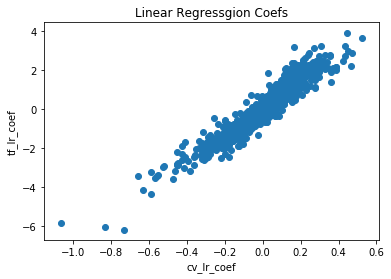

In [57]:
plt.scatter(x=words_coef['cv_lr_coef'],y=words_coef['tf_lr_coef'])
plt.xlabel('cv_lr_coef')
plt.ylabel('tf_lr_coef')
plt.title('Linear Regressgion Coefs');

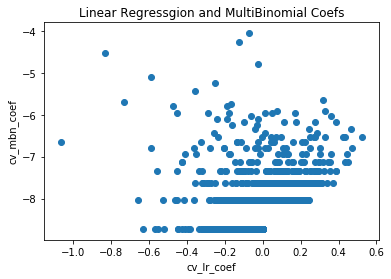

In [39]:
plt.scatter(x=words_coef['cv_lr_coef'],y=words_coef['cv_mbn_coef']);
plt.xlabel('cv_lr_coef')
plt.ylabel('cv_mbn_coef')
plt.title('Linear Regressgion and MultiBinomial Coefs');

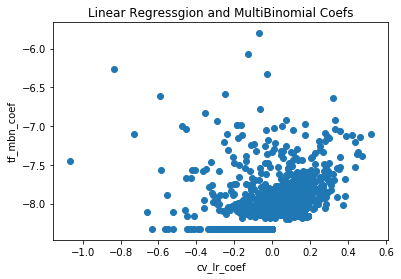

In [41]:
plt.scatter(x=words_coef['cv_lr_coef'],y=words_coef['tf_mbn_coef']);
plt.xlabel('cv_lr_coef')
plt.ylabel('tf_mbn_coef')
plt.title('Linear Regressgion and MultiBinomial Coefs');

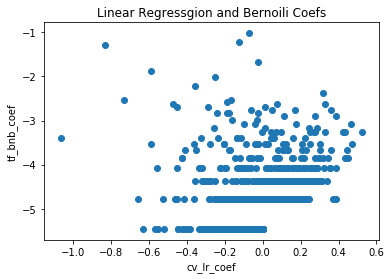

In [45]:
plt.scatter(x=words_coef['cv_lr_coef'],y=words_coef['tf_bnb_coef']);
plt.xlabel('cv_lr_coef')
plt.ylabel('tf_bnb_coef')
plt.title('Linear Regressgion and Bernoili Coefs');

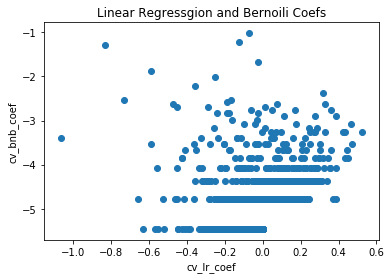

In [46]:
plt.scatter(x=words_coef['cv_lr_coef'],y=words_coef['cv_bnb_coef']);
plt.xlabel('cv_lr_coef')
plt.ylabel('cv_bnb_coef')
plt.title('Linear Regressgion and Bernoili Coefs');

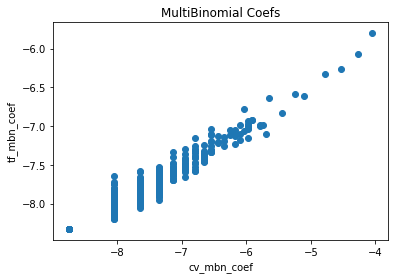

In [47]:
plt.scatter(x=words_coef['cv_mbn_coef'],y=words_coef['tf_mbn_coef']);
plt.xlabel('cv_mbn_coef')
plt.ylabel('tf_mbn_coef')
plt.title('MultiBinomial Coefs');

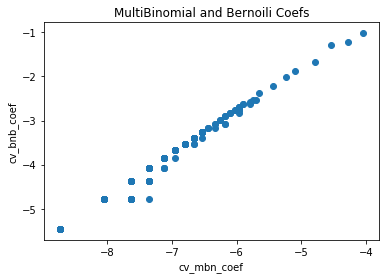

In [49]:
plt.scatter(x=words_coef['cv_mbn_coef'],y=words_coef['cv_bnb_coef']);
plt.xlabel('cv_mbn_coef')
plt.ylabel('cv_bnb_coef')
plt.title('MultiBinomial and Bernoili Coefs');

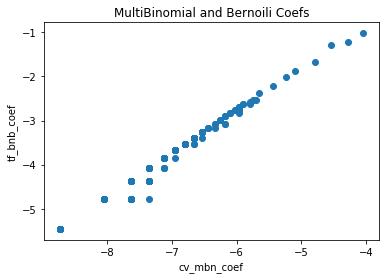

In [51]:
plt.scatter(x=words_coef['cv_mbn_coef'],y=words_coef['tf_bnb_coef']);
plt.xlabel('cv_mbn_coef')
plt.ylabel('tf_bnb_coef')
plt.title('MultiBinomial and Bernoili Coefs');

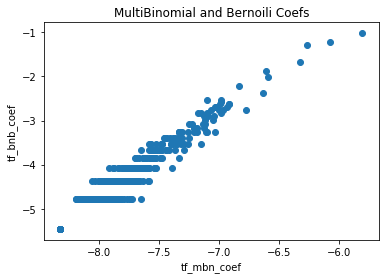

In [52]:
plt.scatter(x=words_coef['tf_mbn_coef'],y=words_coef['tf_bnb_coef']);
plt.xlabel('tf_mbn_coef')
plt.ylabel('tf_bnb_coef')
plt.title('MultiBinomial and Bernoili Coefs');

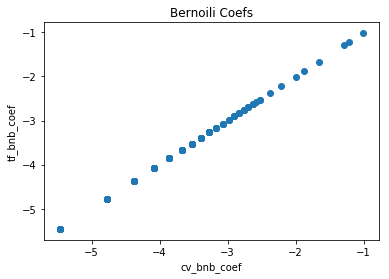

In [67]:
plt.scatter(x=words_coef['cv_bnb_coef'],y=words_coef['tf_bnb_coef']);
plt.xlabel('cv_bnb_coef')
plt.ylabel('tf_bnb_coef')
plt.title('Bernoili Coefs');

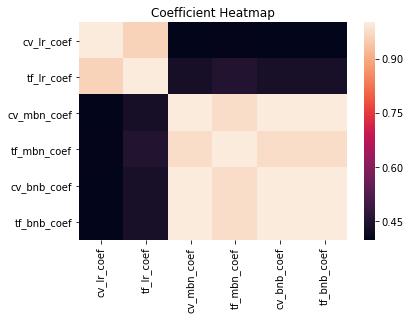

In [82]:
sns.heatmap(words_coef.corr());
plt.title('Coefficient Heatmap');